### Name: Edgar Muturi
### Course: Data Science Part Time
### Phase 3 Project Notebook

# BUSINESS PROBLEM AND UNDERSTANDING

The Coronavirus Disease (COVID-19) pandemic that swept throughout the world from late 2019 to late 2021 was a huge shock to the globe. According to the World Health Organization, there have been about 780 million cases and over 7 million deaths from COVID-19. 

The development of vaccines against the coronavirus went a long way in preventing further morbidity and mortality from this disease. Vaccines have also played a tremendous role in the control of various diseases, including measles and polio. Currently, there are multiple global efforts championing for vaccination of young girls (age 9-15) against the Human Papilloma Virus (HPV), which is the cause of cervical cancer. The aim is to eradicate cervical cancer from the globe by the year 2099.

Despite the development and availability of COVID vaccines from multiple sources (e.g Pfizer, AstraZeneca, Moderna) there have been challenges with uptake of the vaccines. There is a lot of myths and misconceptions about vaccine side effects that make people avoid taking these vaccines despite lack of scientific evidence to substantiate these claims. As such, vaccine-preventable diseases can end up slowly making a comeback and reversing the gains made.





## PROJECT GOAL

This project aims to predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey.

An understanding of how people's backgrounds, opinions and health behaviours are related to their personal vaccination patterns can provide guidance to the World Health Organization to guide vaccination initiatives worldwide.

Stakeholder: World Health Organization Department of Immunization, Vaccines and Biologicals

## 1. DATA PREPARATION

Importation of necessary libraries and loading the csv data into a pandas dataframe

In [247]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from datetime import datetime


In [248]:
# Load the dataset
data = pd.read_csv('training_set_features.csv')
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [250]:
# Summary of the dataset
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [251]:
vaccine_df = pd.read_csv('training_set_labels.csv')
# Display the first few rows of the vaccine data
vaccine_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [252]:
# Merge the features and labels dataframes
merged_data = pd.merge(data, vaccine_df, on='respondent_id', how='left')
# Display the first few rows of the merged data
merged_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## 2. DATA CLEANING

In [253]:
# Check for missing values
merged_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [254]:
# Calculate the percentage of missing values in each column
missing_percentage = merged_data.isnull().mean() * 100
# Display the percentage of missing values
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

The columns with the highest percentage of missing values are employment_occupation (50.44%), employment_industry(49.91%) and health_insurance(45.96%). These columns will be dropped as their percentage of missing values is considerably high.

For the rest of the columns, rows with missing values will be dropped.

In [255]:
# Drop columns with high percentage of missing values
merged_data.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance'], inplace=True)

In [256]:
# Drop rows with missing values in the remaining columns
merged_data.dropna(inplace=True)

In [257]:
# Confirm that there are no more missing values
merged_data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [258]:
# Drop the 'respondent_id' column as it is not needed for analysis
merged_data.drop(columns=['respondent_id'], inplace=True)

In [259]:
# Check unique values in each column
for col in merged_data.columns:
    unique_values = merged_data[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_values)}): {unique_values}")
    print("-" * 50)

Column: h1n1_concern
Unique values (4): [1. 3. 2. 0.]
--------------------------------------------------
Column: h1n1_knowledge
Unique values (3): [0. 2. 1.]
--------------------------------------------------
Column: behavioral_antiviral_meds
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_avoidance
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_face_mask
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_wash_hands
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_large_gatherings
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_outside_home
Unique values (2): [1. 0.]
--------------------------------------------------
Column: behavioral_touch_face
Unique values (2): [1. 0.]
--------------------------------------------------
Column: doctor_recc_h1n1


## 3. EXPLORATORY DATA ANALYSIS


The outcome of interest is whether people got the H1N1 vaccine. Exploratory data analysis will start with some descriptive statistics of our outcome variable.

In [260]:
# Describe the outcome variable
h1n1_data = merged_data[['h1n1_vaccine']]
h1n1_data.describe()

,h1n1_vaccine
count,19642.000000
mean,0.229814
std,0.420724
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [261]:
h1n1_data.value_counts()

h1n1_vaccine
0               15128
1                4514
Name: count, dtype: int64

In [262]:
# Check the percentage distribution of the outcome variable
h1n1_data.value_counts(normalize=True)

h1n1_vaccine
0               0.770186
1               0.229814
Name: proportion, dtype: float64

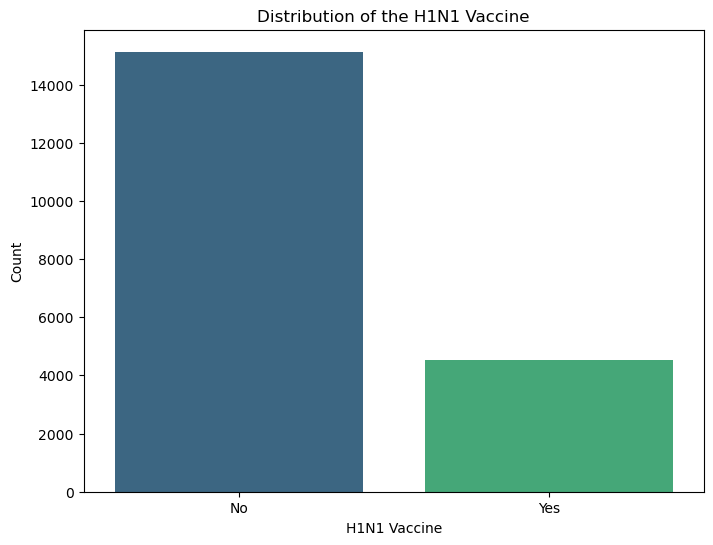

In [263]:
# Visualize the distribution of the outcome variable
plt.figure(figsize=(8, 6))
sns.countplot(x='h1n1_vaccine', data=h1n1_data, palette='viridis')
plt.title('Distribution of the H1N1 Vaccine')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

From the preceding code cells and the visualization above, we can see that 15,128 (77.02%) people did NOT take the H1N1 vaccine while 4,514 (22.98%) people took the H1N1 vaccine.

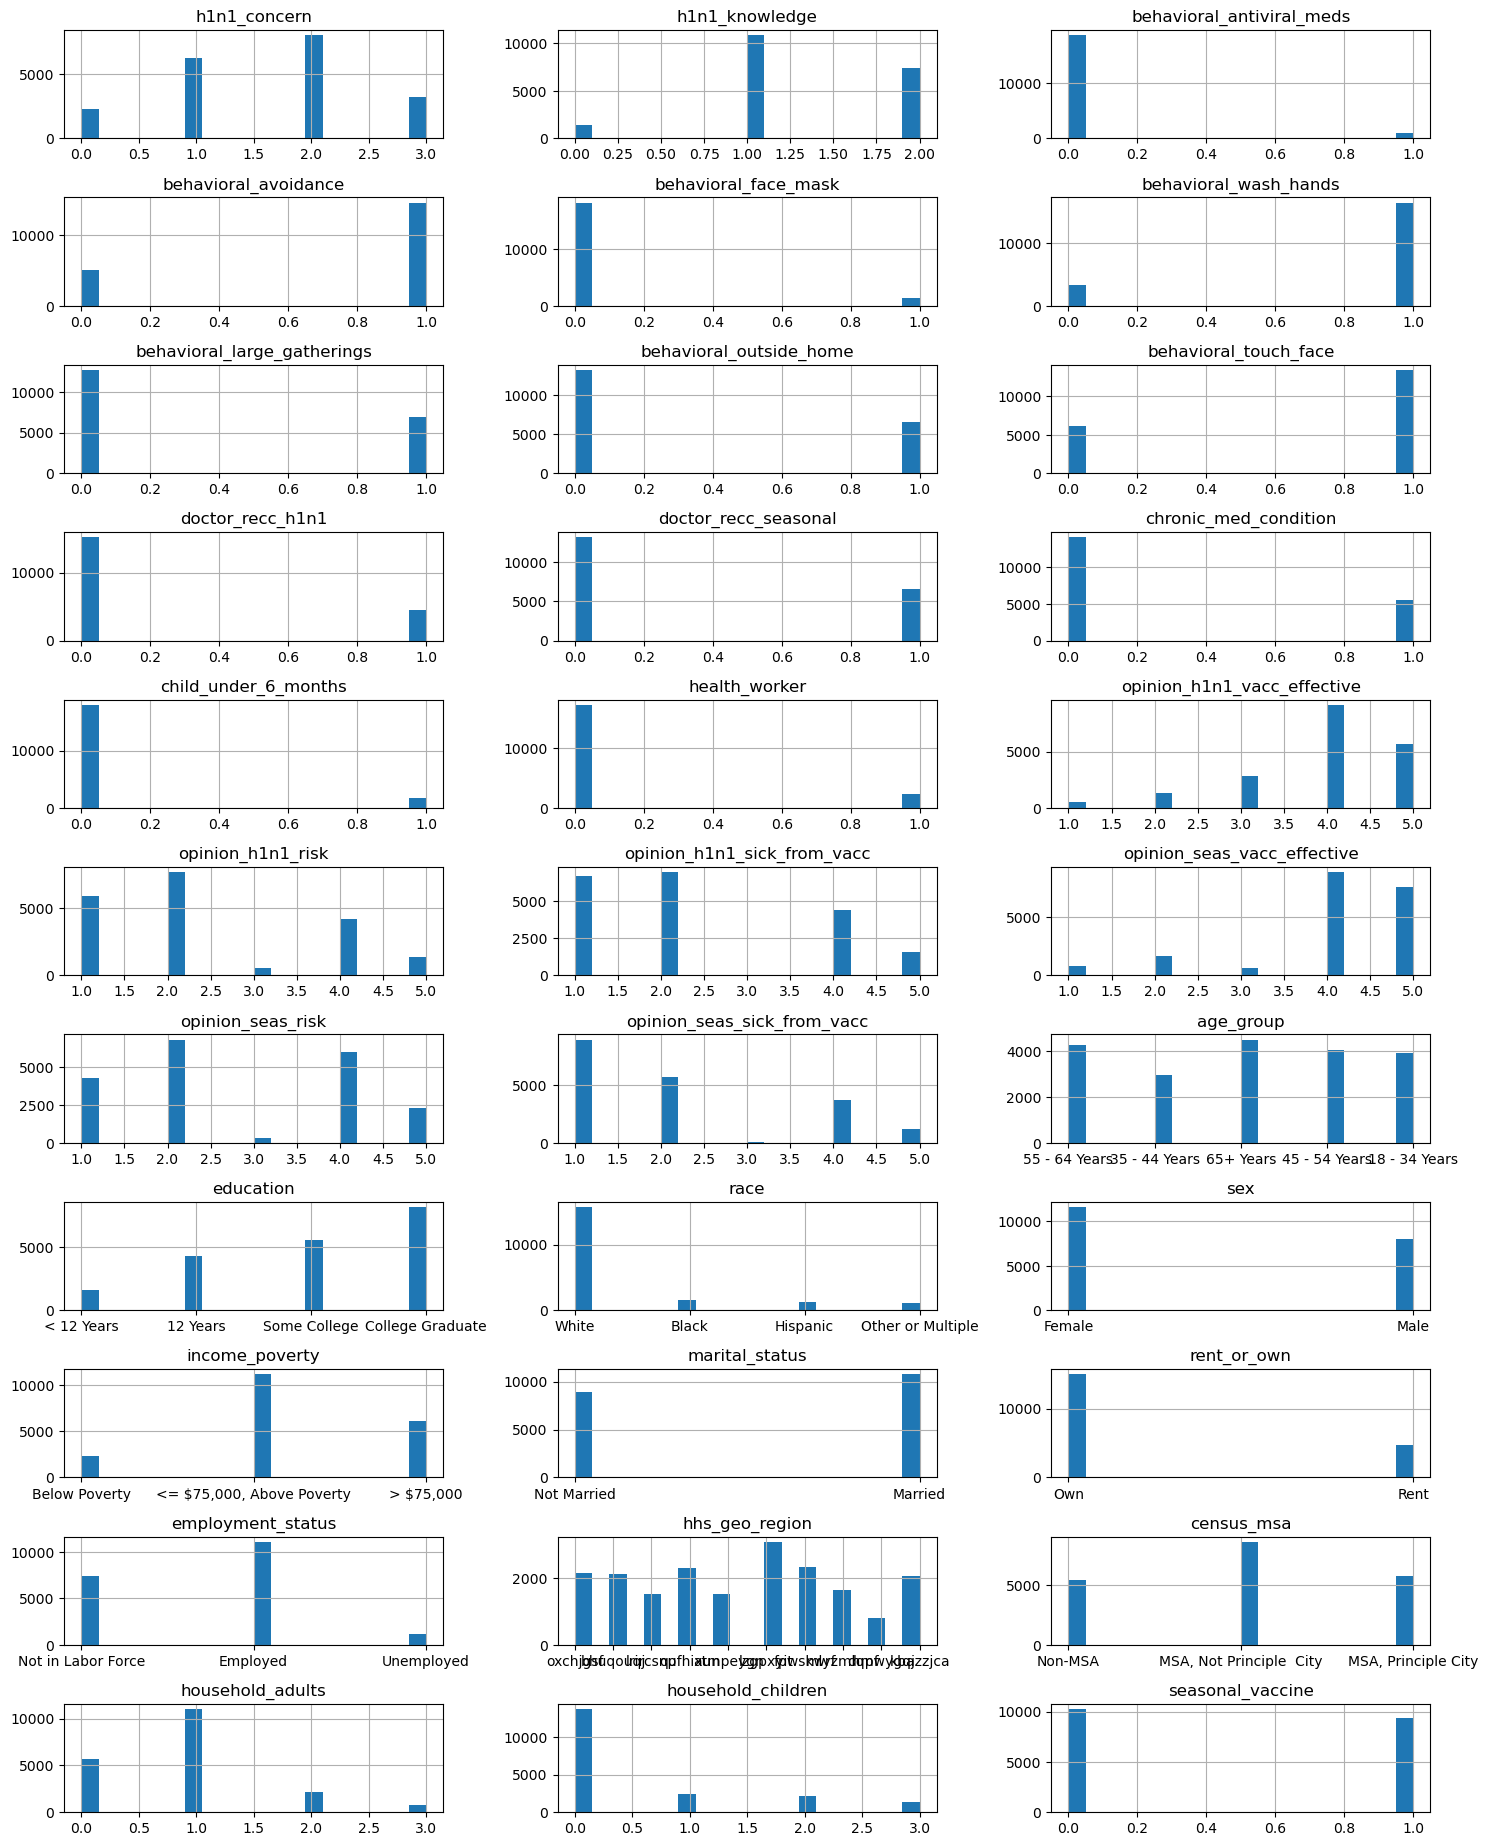

In [264]:
# Plot distribution of the independent variables

# Get a list of columns to plot
columns_to_plot = [col for col in merged_data.columns if col not in ['h1n1_vaccine']]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=len(columns_to_plot) // 3 + 1, ncols=3, figsize=(15, 20))

# Flatten the axes if needed
if len(columns_to_plot) < 4:
    axes = axes.reshape(1, -1)

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 3, i % 3]
    merged_data[col].hist(ax=ax, bins=20)
    ax.set_title(col)

# Remove empty subplots
for i in range(len(columns_to_plot), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()



From the visualization above, it is clear that the distributions of most predictor variables are imbalanced.

### Analysis of how each independent variable compares with H1N1 vaccine uptake

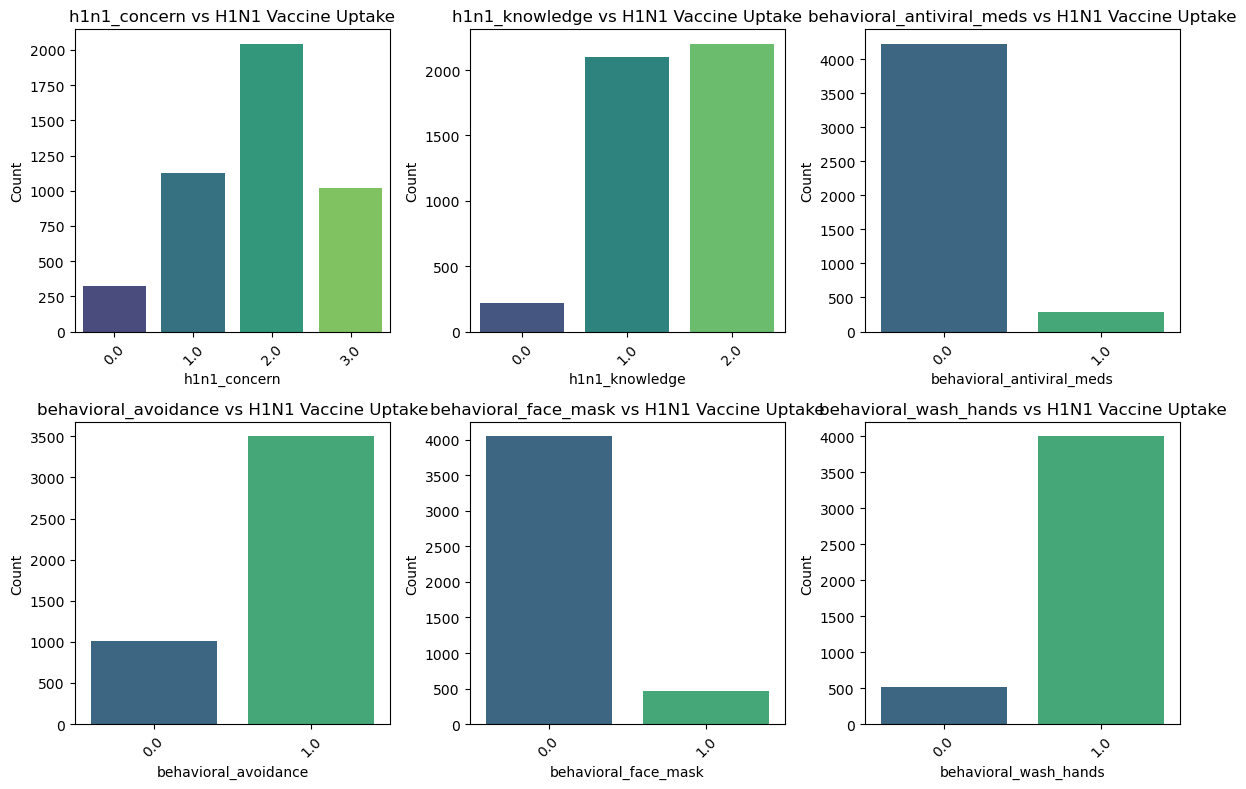

In [265]:
# Filter for rows where h1n1_vaccine is 1 (Yes)
h1n1_yes = merged_data[merged_data['h1n1_vaccine'] == 1]

plt.figure(figsize=(12, 8))
for i, col in enumerate(merged_data.columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=h1n1_yes, palette='viridis')
    plt.title(f'{col} vs H1N1 Vaccine Uptake')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()



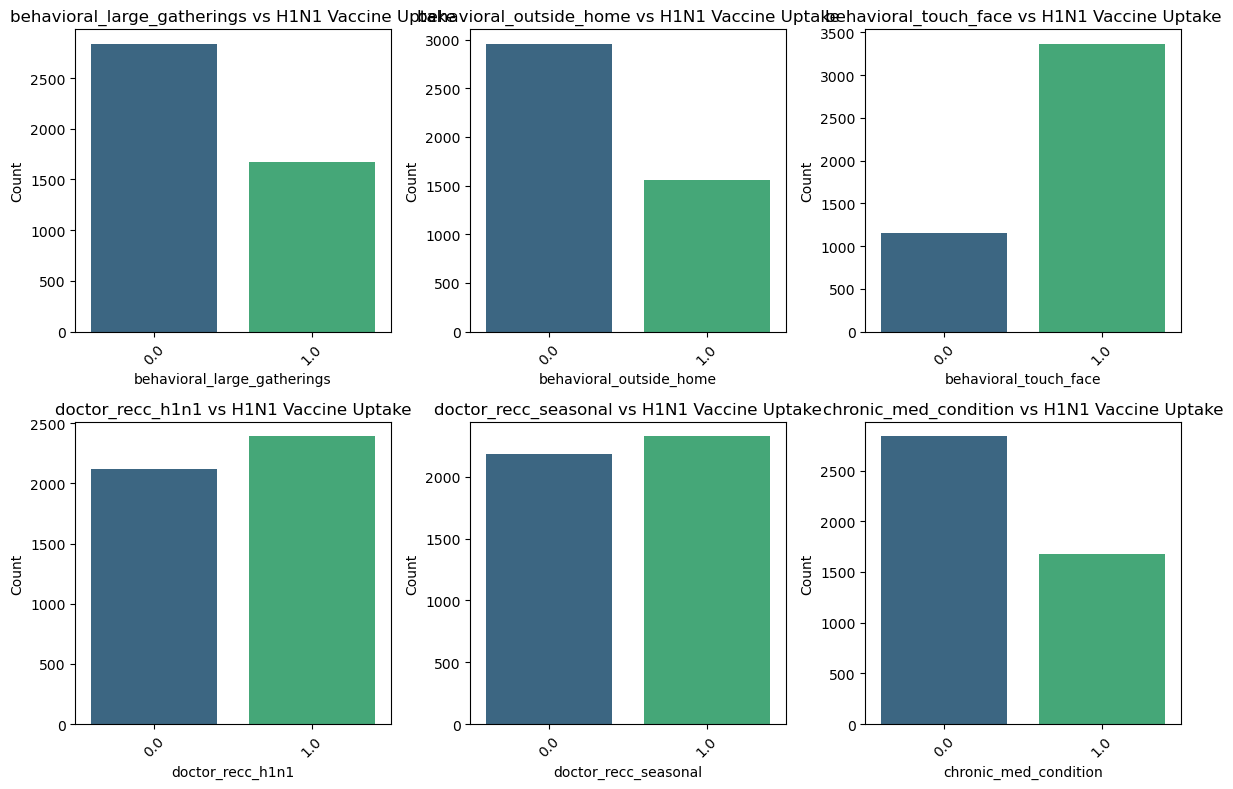

In [266]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(merged_data.columns[6:12], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=h1n1_yes, palette='viridis')
    plt.title(f'{col} vs H1N1 Vaccine Uptake')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

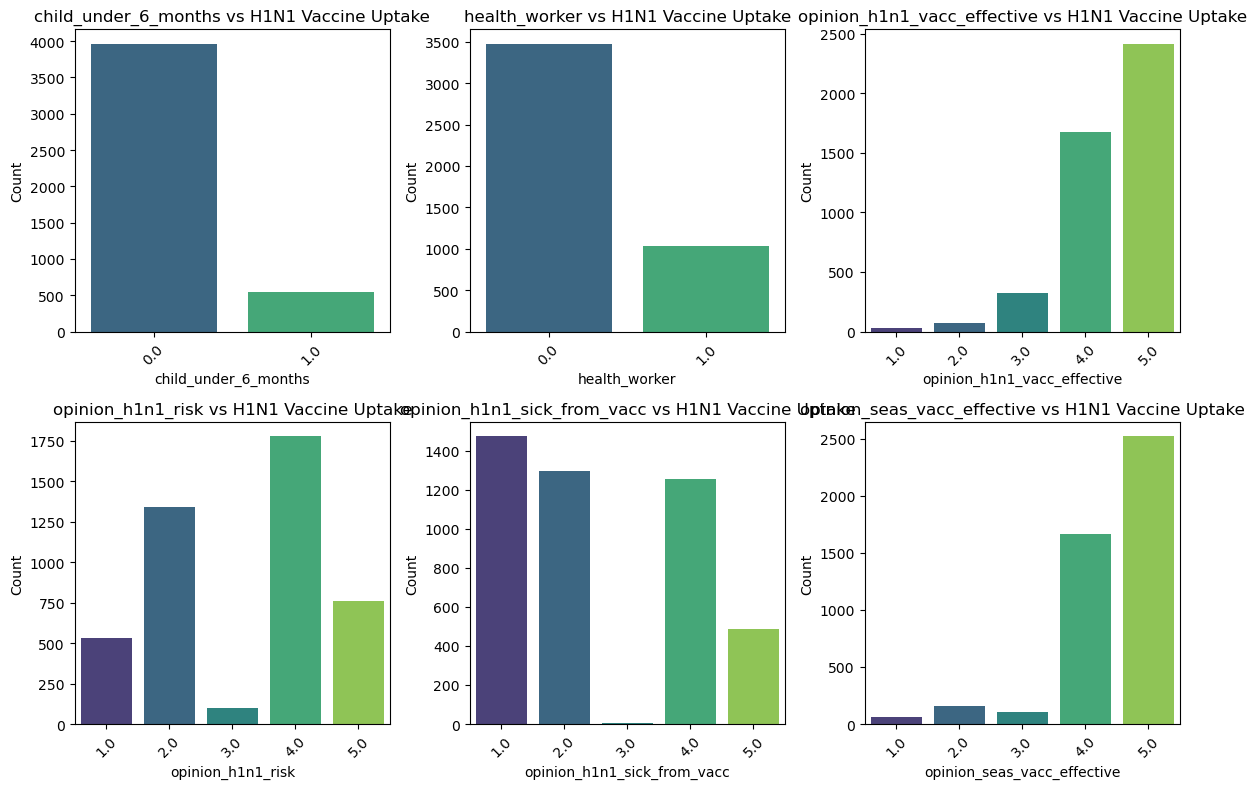

In [267]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(merged_data.columns[12:18], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=h1n1_yes, palette='viridis')
    plt.title(f'{col} vs H1N1 Vaccine Uptake')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

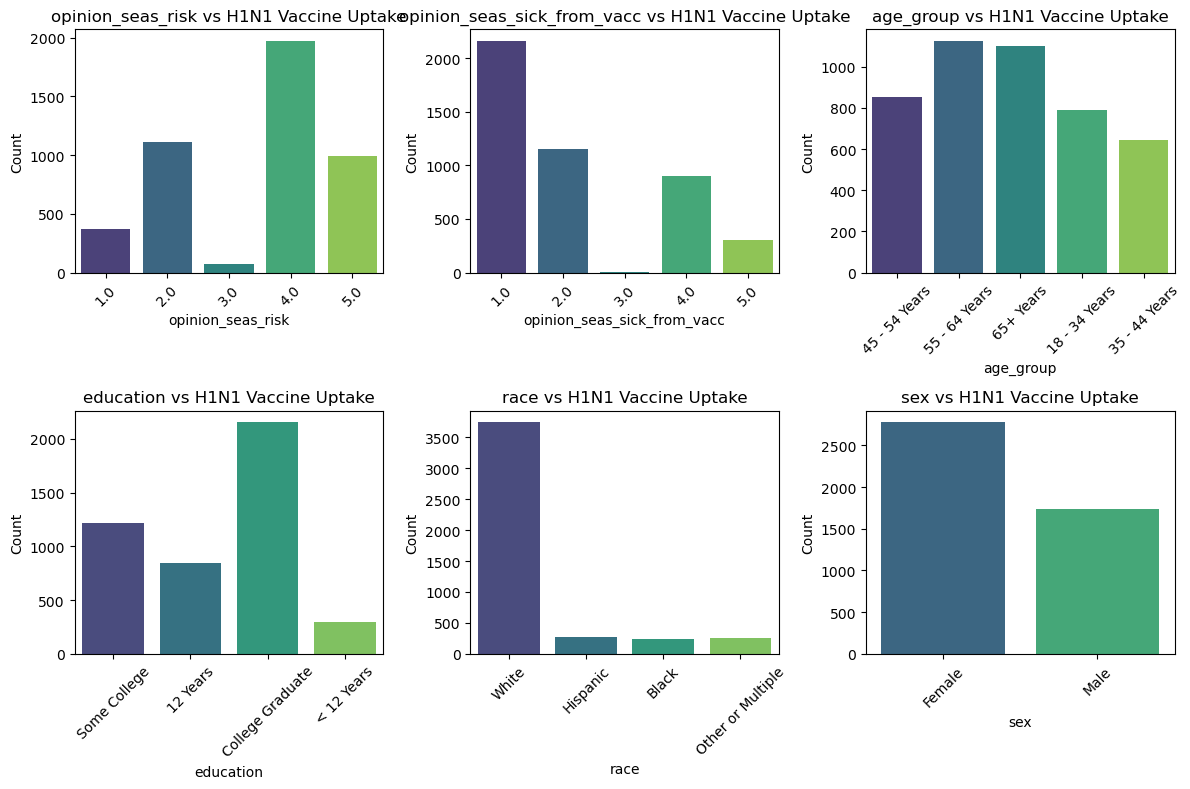

In [268]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(merged_data.columns[18:24], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=h1n1_yes, palette='viridis')
    plt.title(f'{col} vs H1N1 Vaccine Uptake')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

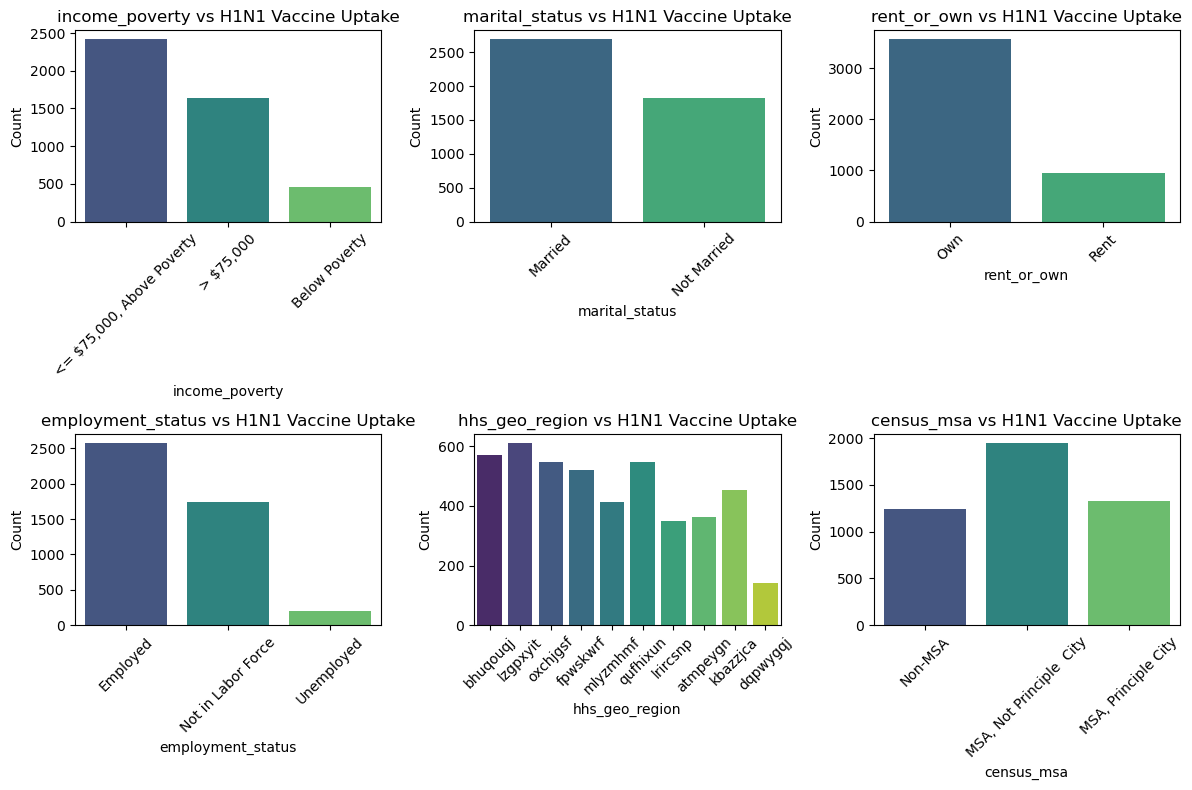

In [269]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(merged_data.columns[24:30], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=h1n1_yes, palette='viridis')
    plt.title(f'{col} vs H1N1 Vaccine Uptake')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

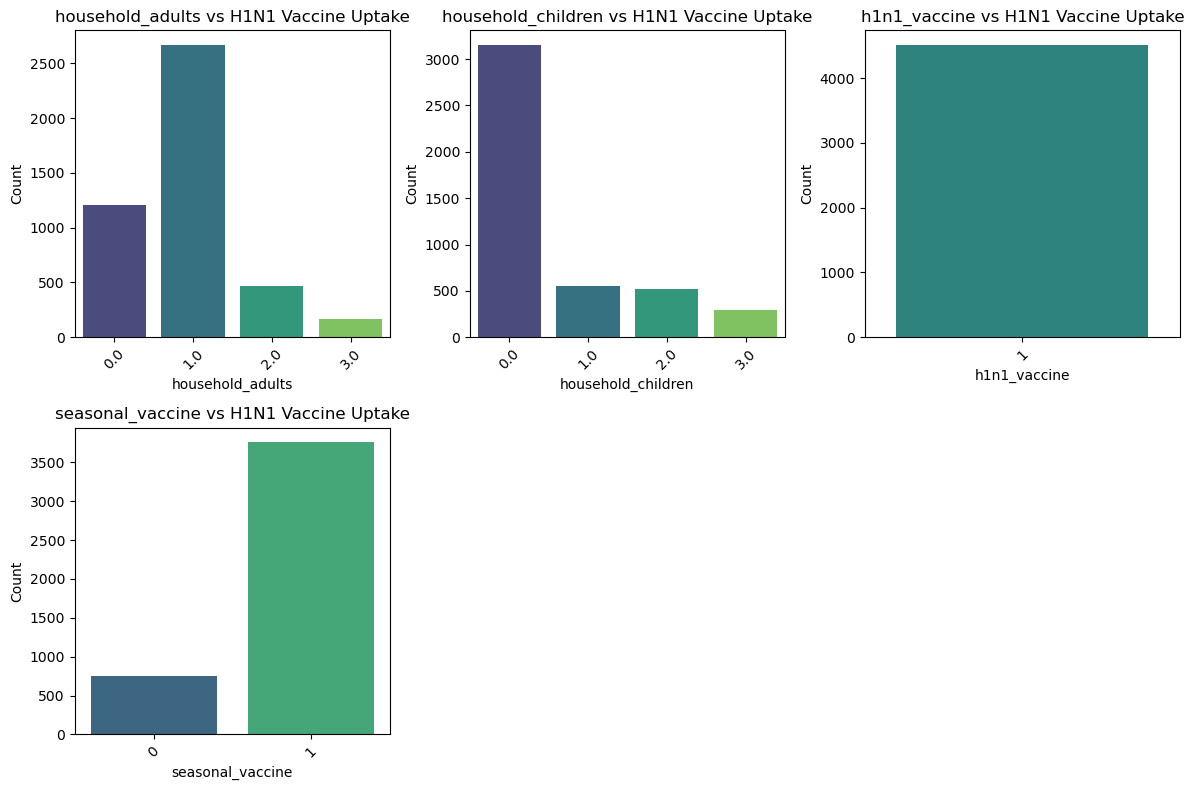

In [270]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(merged_data.columns[30:34], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=h1n1_yes, palette='viridis')
    plt.title(f'{col} vs H1N1 Vaccine Uptake')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

## Analysis of how each independent variable compared with H1N1 vaccine uptake

### For each independent variable, a comparative higher (or highest for variables with more than 2 columns) H1N1 vaccine uptake was observed in the following categories:

1. Individuals with moderate H1N1 concern (2.0)
2. Individuals with high H1N1 knowledge (2.0)
3. Individuals with no behavioural use of antiviral meds (0.0)
4. Individuals with behavioural avoidance behaviour (1.0)
5. Individuals who do not use face masks (0.0)
6. Individuals who wash their hands (1.0)
7. Individuals who do not gather in large crowds (0.0)
8. Individuals with no behavoural outside home (0.0)
9. Individuals who touch their faces (1.0)
10. Individuals who had the H1N1 vaccine recommended to them by their doctor
11. Individuals who had the seasonal vaccine recommended to them by their doctor
12. Individuals without a chronic medical condition
13. Individuals with no child under 6 months
14. Individuals who are not health workers
15. Individuals who strongly believed the H1N1 vaccine was effective (5.0)
16. Individuals with moderate belief of the risk of the H1N1 vaccine (4.0)
17. Individuals with low belief of getting sick from the H1N1 vaccine (1.0)
18. Individuals with strong belief that the Seasonal Vaccine is effective (5.0)
19. Individuals with moderate belief of the risk of the Seasonal Vaccine (4.0)
20. Individuals with low belief of getting sick from the Seasonal Vaccine (1.0)
21. Individuals above age 55
22. College graduates
23. Individuals of white race
24. Individuals of female sex
25. Individuals of income < $75,000 above poverty
26. Married individuals
27. Individuals who own their houses
28. Individuals who are employed
29. Individuals with MSA, not principle city
30. Individuals in households with one adult
31. Individuals in households with no children
32. Individuals who took the seasonal vaccine

Multivariate analysis with a correlation matrix to find out which independent variables have the strongest correltion with getting the H1N1 vaccine

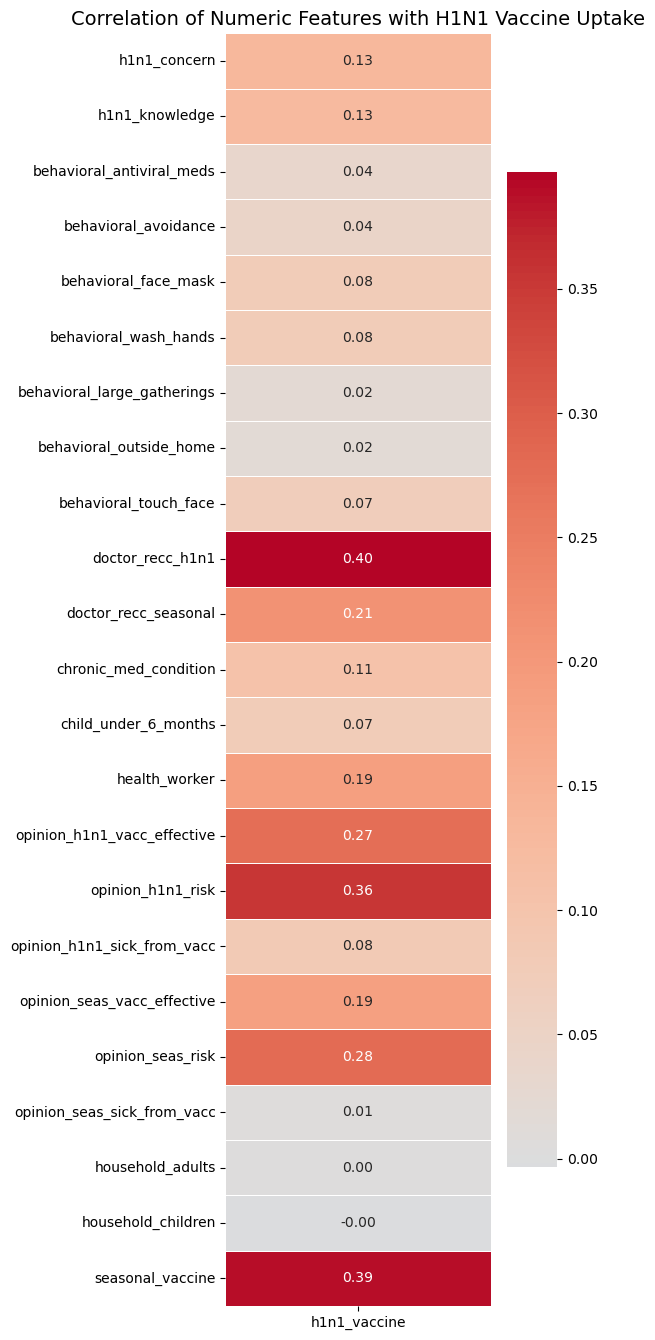

In [271]:
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Extract correlations with h1n1_vaccine
h1n1_corr = corr_matrix[['h1n1_vaccine']].drop(index='h1n1_vaccine')

# Plot heatmap
plt.figure(figsize=(6, len(h1n1_corr) * 0.5 + 2))
sns.heatmap(h1n1_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation of Numeric Features with H1N1 Vaccine Uptake', fontsize=14)
plt.tight_layout()
plt.show()

From the correlation vetrical heatmap above, we see that doctor recommendation for the H1N1 vaccine(0.40) and taking the seasonal vaccine(0.39) have the strongest correlations with H1N1 vaccine uptake

## 4. CREATION OF MACHINE LEARNING MODELS

## BASELINE MODEL

### Logistic Regression

Logistic Regression will be the baseline model. 
However, there was class imbalance noted during exploratory data analysis in the H1N1 vaccine class.

To address this, Synthetic Minority Over-sampling Technique (SMOTE) will be used.

In [272]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

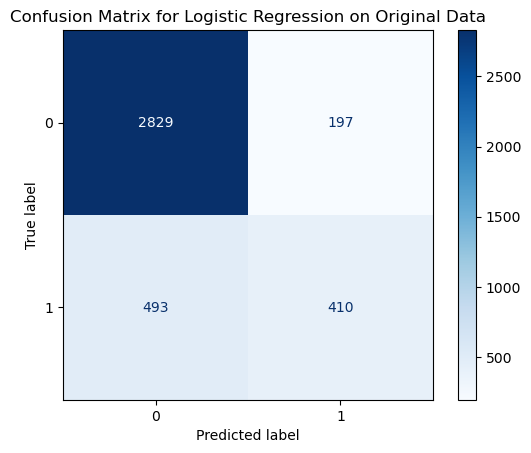

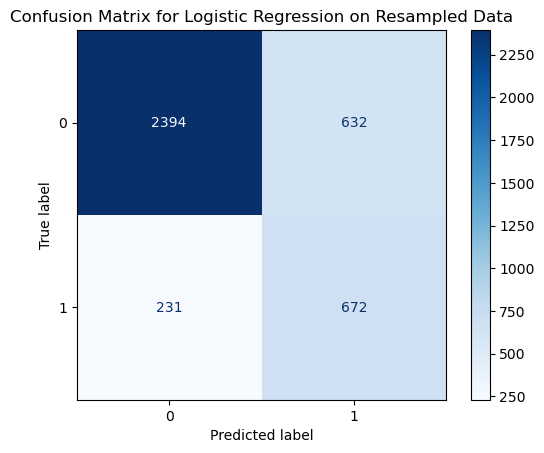

Classification Report for Logistic Regression on Original Data:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3026
           1       0.68      0.45      0.54       903

    accuracy                           0.82      3929
   macro avg       0.76      0.69      0.72      3929
weighted avg       0.81      0.82      0.81      3929

Classification Report for Logistic Regression on SMOTE-Resampled Data:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      3026
           1       0.52      0.74      0.61       903

    accuracy                           0.78      3929
   macro avg       0.71      0.77      0.73      3929
weighted avg       0.82      0.78      0.79      3929

Confusion Matrix on SMOTE-resampled data:
[[2394  632]
 [ 231  672]]


In [273]:
# Define the features and target variable
X = merged_data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = merged_data['h1n1_vaccine']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)
# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model on the original imbalanced data
log_reg = LogisticRegression(max_iter=1000, random_state=42, solver= 'liblinear')
# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Confusion Matrix and Classification Report
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression on Original Data')
plt.show()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model on the resampled data
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

# Fit the model on the resampled training data
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Confusion Matrix and Classification Report for the model trained on resampled data
ConfusionMatrixDisplay.from_estimator(log_reg_smote, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression on Resampled Data')
plt.show()

# Make predictions on the test set
y_pred_smote = log_reg_smote.predict(X_test)

# Evaluate the model performance on the original imbalanced data
print("Classification Report for Logistic Regression on Original Data:")
print(classification_report(y_test, log_reg.predict(X_test)))

# Evaluate the model performance on SMOTE-resampled data
print("Classification Report for Logistic Regression on SMOTE-Resampled Data:")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix on SMOTE-resampled data:")
print(confusion_matrix(y_test, y_pred_smote))




Resampling via SMOTE has impacted the model in the following ways:

1. For the 0 (not vaccinated for H1N1) predictions, precision went from 0.85 to 0.91, recall dropped from 0.93 to 0.79, f1 score dropped from 0.89 to 0.85.
2. For the 1 (vaccinated for H1N1), precision dropped from 0.68 to 0.52, recall improved from 0.45 to 0.74, f1 score improved from 0.54 to 0.61.
3. Accuracy dropped from 0.82 to 0.78

### CROSS VALIDATION

In [274]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation on the SMOTE-resampled Logistic Regression model
cross_val_scores = cross_val_score(log_reg_smote, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores for Logistic Regression on SMOTE-resampled data:")
print(cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))


Cross-validation scores for Logistic Regression on SMOTE-resampled data:
[0.7682297  0.7742202  0.77979756 0.78599463 0.7838843 ]
Mean cross-validation score: 0.7784252792521181


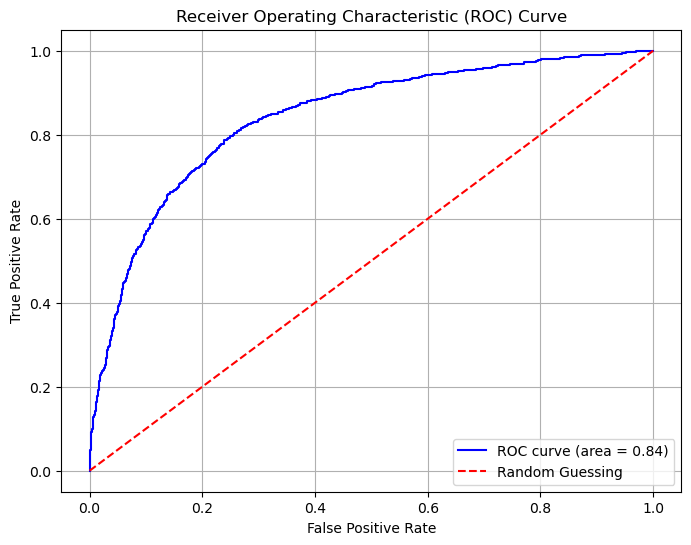

In [275]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote.predict_proba(X_test)[:, 1])
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The ROC curve plots the true positive rate(sensitivity) on the y axis against the false positive rate(1-specificity) on the x axis.
The Area Under the curve (0.84) quantifies the model's ability to distinguish between the positive and negative classes. This model has good discriminatory power

### Feature Selection

The model has many features. This runs the risk of over fitting and thus poor model performance

We will carry out feature selection through elastic net regularization.

It combines L1 and L2 regularization hence optimal bias-variance trade-off

In [276]:
from sklearn.linear_model import ElasticNetCV
# Initialize the ElasticNetCV model
elastic_net = ElasticNetCV(cv=5, random_state=42)
# Fit the model on the resampled training data
elastic_net.fit(X_train_resampled, y_train_resampled)

ElasticNetCV(cv=5, random_state=42)

ElasticNet Model Accuracy: 0.08102499613971736
Confusion Matrix for ElasticNet:
[[2431  595]
 [ 240  663]]
Classification Report for ElasticNet:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      3026
           1       0.53      0.73      0.61       903

    accuracy                           0.79      3929
   macro avg       0.72      0.77      0.73      3929
weighted avg       0.82      0.79      0.80      3929



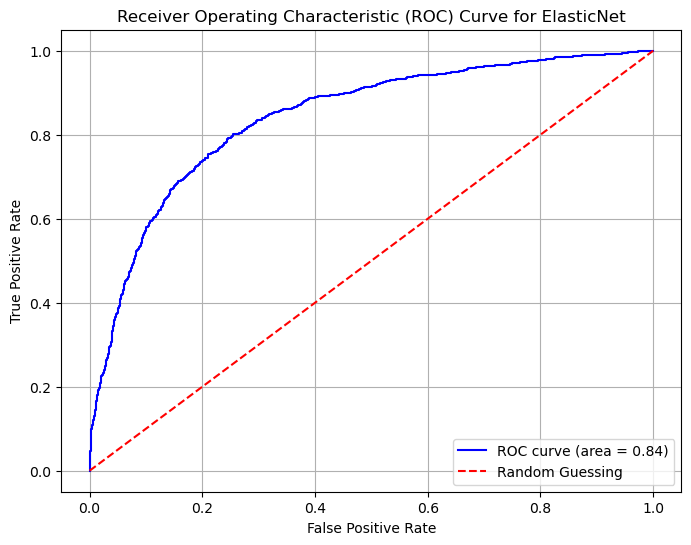

In [277]:
# Make predictions on the test set
y_pred_en = elastic_net.predict(X_test)

# Evaluate the moodel accuracy
accuracy_en = elastic_net.score(X_test, y_test)
print("ElasticNet Model Accuracy:", accuracy_en)

# Confusion Matrix and Classification Report for ElasticNet
cm_en = confusion_matrix(y_test, np.round(y_pred_en))
print("Confusion Matrix for ElasticNet:")
print(cm_en)

print("Classification Report for ElasticNet:")
print(classification_report(y_test, np.round(y_pred_en)))

# ROC Curve for ElasticNet
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, elastic_net.predict(X_test))
roc_auc_en = auc(fpr_en, tpr_en)

plt.figure(figsize=(8, 6))
plt.plot(fpr_en, tpr_en, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_en))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve for ElasticNet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()



ROC remains the same at 0.84, while accuracy improves from 0.78 to 0.79

## DECISION TREES

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3026
           1       0.44      0.48      0.46       903

    accuracy                           0.74      3929
   macro avg       0.64      0.65      0.65      3929
weighted avg       0.75      0.74      0.75      3929

Confusion Matrix for Decision Tree Classifier:
[[2480  546]
 [ 466  437]]


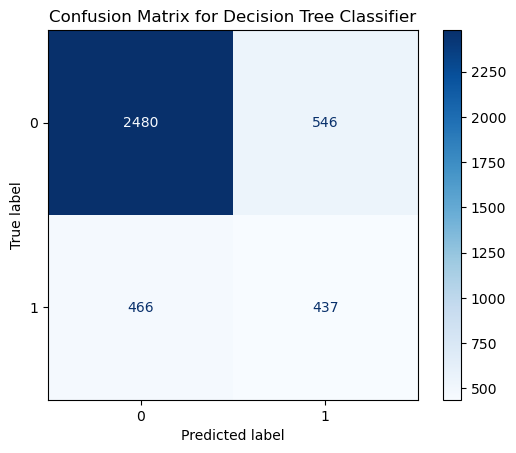

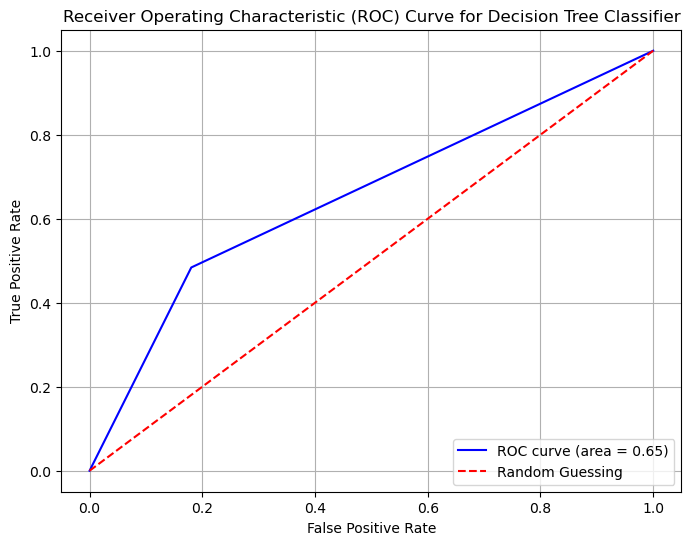

In [278]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the resampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model performance
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree Classifier:")
print(cm_dt)

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Plot ROC curve for Decision Tree Classifier
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()














### Hyperparameter tuning to improve model performance

In [279]:
# Hyperparameter tuning to improve model performance
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid for Decision Tree Classifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters for Decision Tree Classifier:")
print(best_params)




Best Hyperparameters for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}


Classification Report for Best Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3026
           1       0.51      0.47      0.49       903

    accuracy                           0.78      3929
   macro avg       0.68      0.67      0.67      3929
weighted avg       0.77      0.78      0.77      3929

Confusion Matrix for Best Decision Tree Classifier:
[[2625  401]
 [ 481  422]]


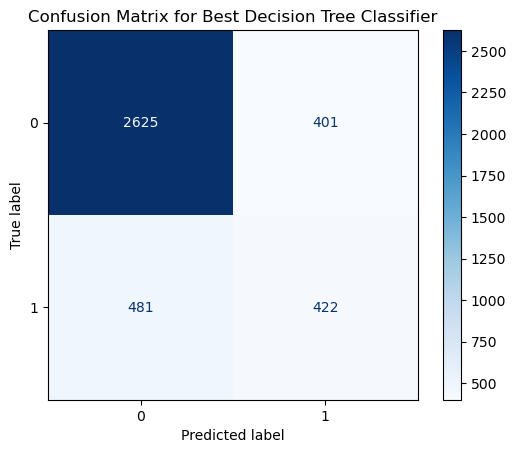

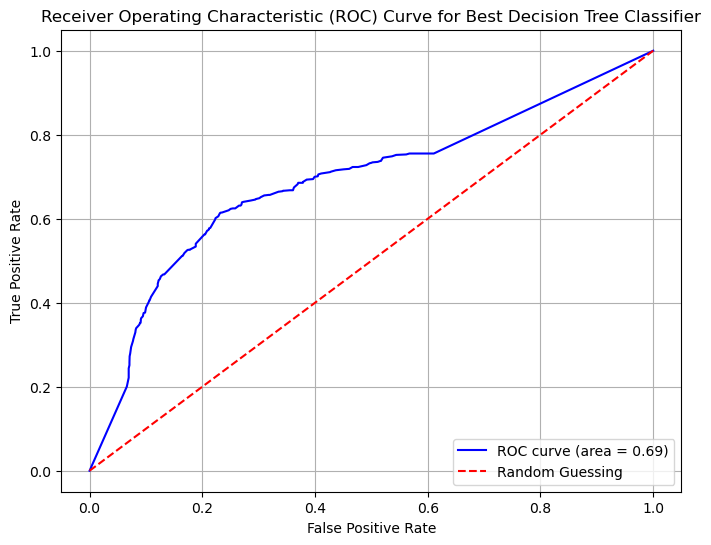

In [280]:
# Train the Decision Tree Classifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the model on the resampled training data
best_decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best_dt = best_decision_tree.predict(X_test)

# Evaluate the model performance with best hyperparameters
print("Classification Report for Best Decision Tree Classifier:")
print(classification_report(y_test, y_pred_best_dt))

# Confusion Matrix for Best Decision Tree Classifier
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
print("Confusion Matrix for Best Decision Tree Classifier:")
print(cm_best_dt)

# Display the confusion matrix for the best Decision Tree Classifier
ConfusionMatrixDisplay.from_estimator(best_decision_tree, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for Best Decision Tree Classifier')
plt.show()

# Plot ROC curve for Best Decision Tree Classifier
fpr_best_dt, tpr_best_dt, thresholds_best_dt = roc_curve(y_test, best_decision_tree.predict_proba(X_test)[:, 1])
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_best_dt))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()



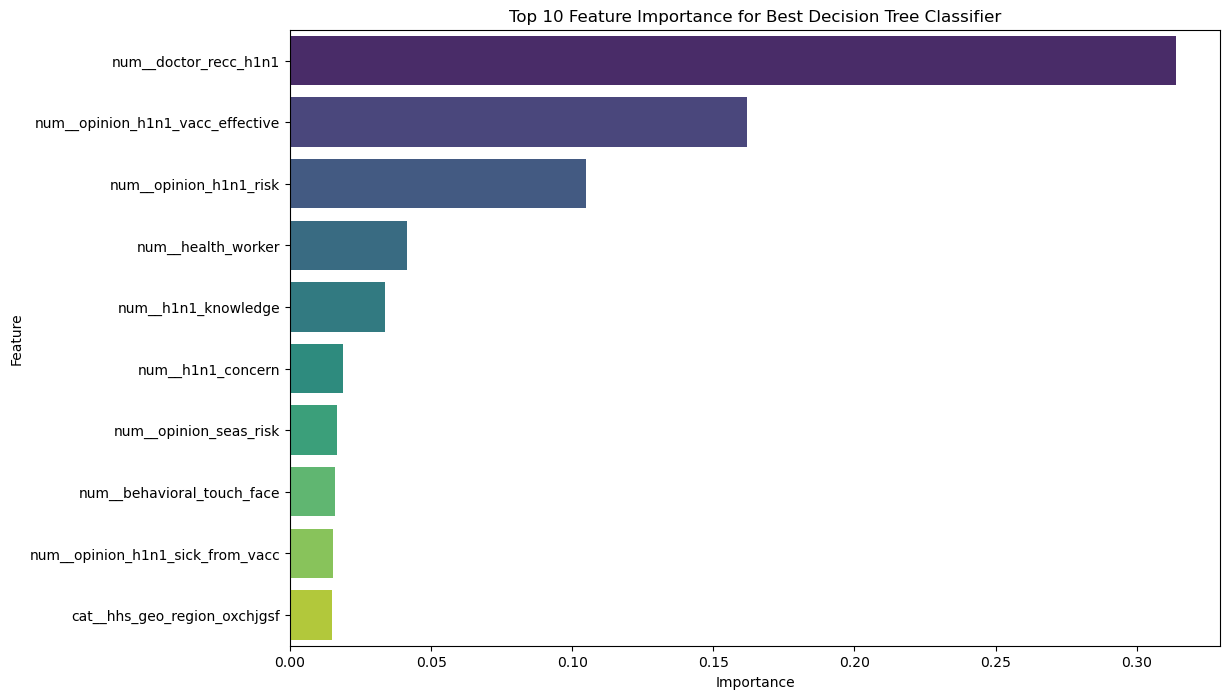

In [281]:
# Feature importance for the best Decision Tree Classifier
importances = best_decision_tree.feature_importances_
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot top 10 feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(10)
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importance for Best Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### K Nearest Neighbour

Classification Report for K Nearest Neighbour:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71      3026
           1       0.36      0.77      0.49       903

    accuracy                           0.63      3929
   macro avg       0.63      0.68      0.60      3929
weighted avg       0.77      0.63      0.66      3929

Confusion Matrix for K Nearest Neighbour:
[[1775 1251]
 [ 205  698]]


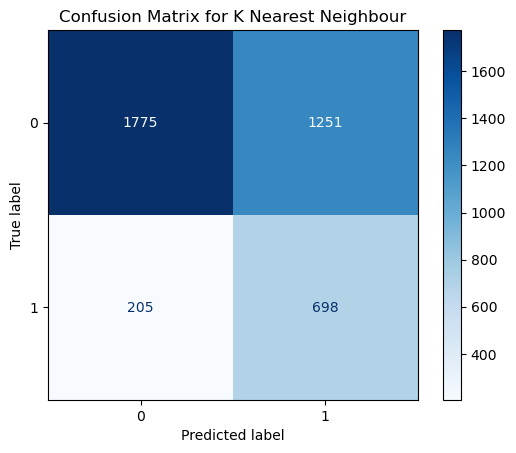

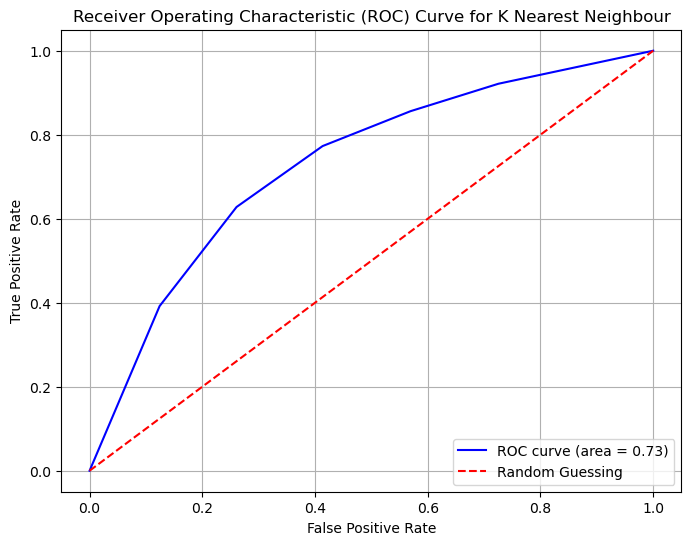

In [282]:
# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K Nearest Neighbour model
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the resampled training data
knn.fit(X_train_resampled, y_train_resampled)
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model performance
print("Classification Report for K Nearest Neighbour:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for K Nearest Neighbour
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for K Nearest Neighbour:")
print(cm_knn)

# Display the confusion matrix for K Nearest Neighbour
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for K Nearest Neighbour')
plt.show()

# Plot ROC curve for K Nearest Neighbour
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve for K Nearest Neighbour')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


AUC is 0.73. Model has moderate ability to distinguish between the two classes.
Accuracy is 63%

## 5. CONCLUSION

* The best model is logistic regression, as it has the highest accuracy, highest precision for positive predictions, highest recall for negative predictions and highest f1 score for negative predictions. As such, it outperforms the other models tested in this notebook.

* The most relevant factors for vaccine uptake, as per the decision tree feature importance are:
   1. Doctor recommending H1N1 vaccine
   2. Individual opinion on the effectiveness of the H1N1 vaccine
   3. Opinion of the risk of H1N1
   4. Whether an individual is a health worker
   5. H1N1 knowledge
   6. H1N1 concern.

## 6. RECOMMENDATIONS

Based on the findings in this notebook, the following measures are recommended to the World Health Organization Department of Immunization, Vaccines and Biologicals:
1. Encourage doctors to recommend vaccines to their patients. This should start as early as in medical school where they are taught on how to educate their patients about the benefits of vaccines. Given patients trust doctors' opinion, this will help to encourage vaccine uptake.
2. Public Health Education on the safety of vaccines. A lot of misinformation exists on vaccines and this, as seen in our data analysis, has an impact on vaccine uptake. Education of the masses from government and WHO-verified sources will help debunk myths and misconceptions and ensure the public has the correct information.
3. Public Education on H1N1. As seen in our data analysis, knowledge (and lack thereof) of H1N1 as a disease and its risks impacts vaccine uptake. Widespread dissemination of simple, easy-to-understand information on H1N1 will help the public understand why taking the vaccine is important. 
